#Persiapan Data

In [ ]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.fashion_mnist

(train_data, train_label), (test_data, test_label) = mnist.load_data()

train_data = train_data/255
test_data = test_data/255

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

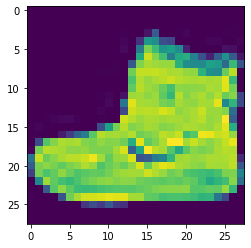

In [ ]:
import matplotlib.pyplot as plt

print(train_data[0])
plt.imshow(train_data[0])
print(train_label[0])

9


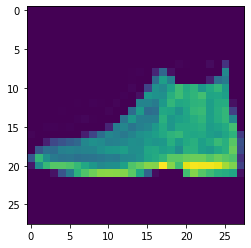

In [ ]:
plt.imshow(test_data[0])
print(test_label[0])

# Buat Model

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 512)              

#Compile Model

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

# Fit Model

In [ ]:
model.fit(train_data, train_label, epochs=5, verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4599 - accuracy: 0.8302
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3120 - accuracy: 0.8838
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2718 - accuracy: 0.8988
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2404 - accuracy: 0.9100
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2165 - accuracy: 0.9193


# Evaluate Model

In [ ]:
loss, acc = model.evaluate(test_data, test_label)
print(loss, acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.2649 - accuracy: 0.9045
0.26493507623672485 0.9045000076293945


# Prediksi Data

In [ ]:
prediction = model.predict([[test_data[1:2]]])
print(prediction)

[[7.5765461e-06 2.7806482e-13 9.9989402e-01 7.9339824e-10 8.3527768e-05
  3.0354514e-11 1.4817488e-05 9.8591459e-15 7.2978786e-08 7.0258643e-13]]


2


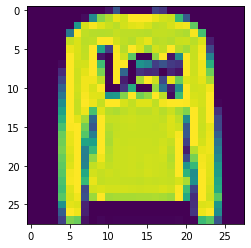

In [ ]:
plt.imshow(test_data[1])
print(test_label[1])